# CIFAR10 CLASSIFICATION

## Using Convolution Neural Networks

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\Users\ACER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ACER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ACER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ACER\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [3]:
X_train.shape


(50000, 32, 32, 3)

In [4]:
X_test.shape


(10000, 32, 32, 3)

In [5]:
y_train.shape


(50000, 1)

In [6]:
y_test.shape


(10000, 1)

## VISUALIZING DATA

[9]


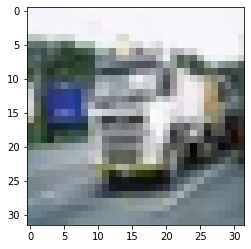

In [7]:
i=1000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


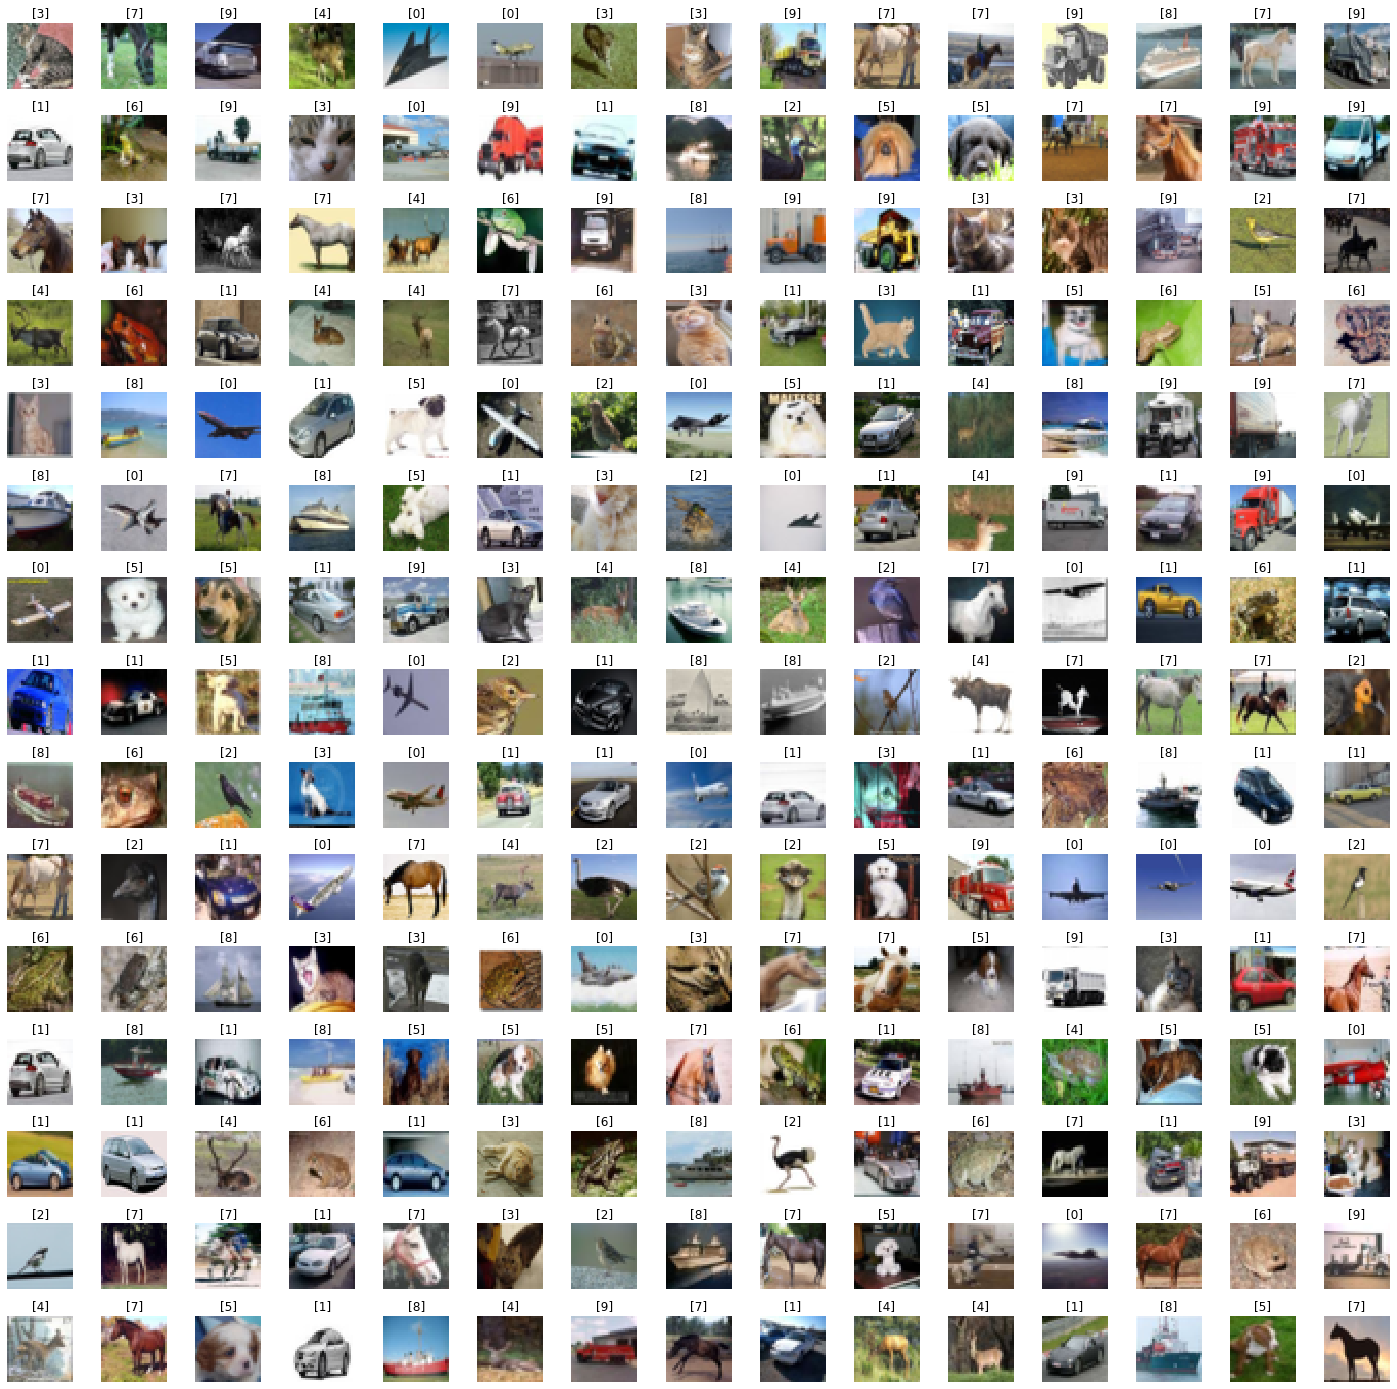

In [8]:
W_grid=15
L_grid=15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

## DATA PREPARATION

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat=10

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test = keras.utils.to_categorical(y_test, number_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [17]:
Input_shape = X_train.shape[1:]

In [18]:
Input_shape

(32, 32, 3)

## MODEL TRAINING

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [20]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation= 'relu'))
cnn_model.add(Dense(units = 512, activation= 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [21]:
cnn_model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.rmsprop(lr = 0.001), metrics=['accuracy'])

In [22]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle =  True)


Epoch 1/4
50000/50000 [==============================] - 387s 8ms/step - loss: 1.6376 - accuracy: 0.4044
Epoch 2/4
50000/50000 [==============================] - 383s 8ms/step - loss: 1.2827 - accuracy: 0.5467
Epoch 3/4
50000/50000 [==============================] - 408s 8ms/step - loss: 1.1672 - accuracy: 0.5936
Epoch 4/4
50000/50000 [==============================] - 395s 8ms/step - loss: 1.1198 - accuracy: 0.6124


## EVALUATING THE MODEL

In [23]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 18s 2ms/step
Test Accuracy: 0.6657000184059143


In [24]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [25]:
y_test = y_test.argmax(1)

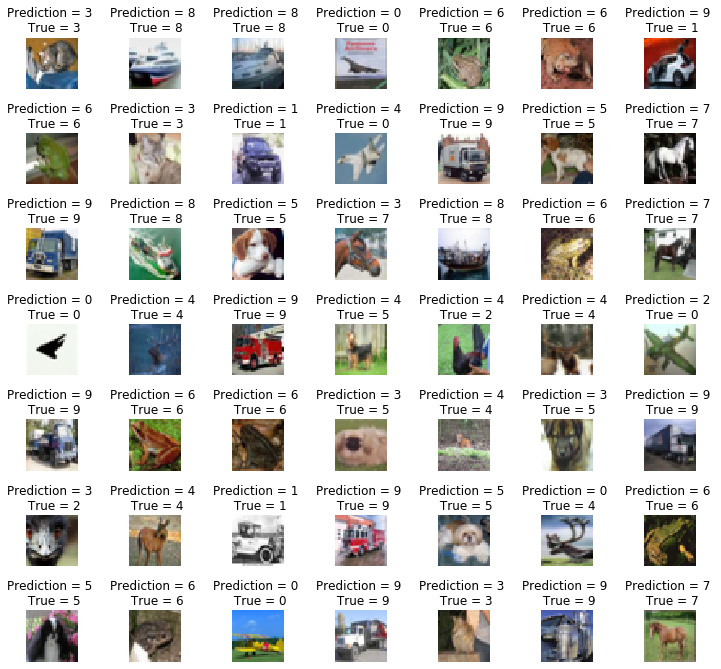

In [26]:
L=7
W=7
fig, axes = plt.subplots(L, W, figsize =(12,12))
axes= axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)

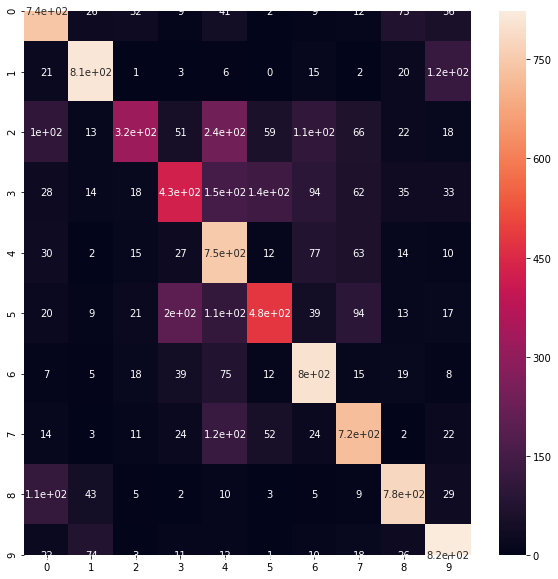

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm= confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=  (10,10))
sns.heatmap(cm, annot = True)

## SAVING THE MODEL 


In [28]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

## DATA AUGUMENTATION FOR CIFAR-10 DATASET

In [29]:
import keras
from keras.datasets import cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [30]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [32]:
n = 8
X_train_sample = X_train[:n]

In [34]:
X_train_sample.shape

(8, 32, 32, 3)

In [61]:
from keras.preprocessing.image import ImageDataGenerator
# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,2))
dataget_train.fit(X_train_sample)

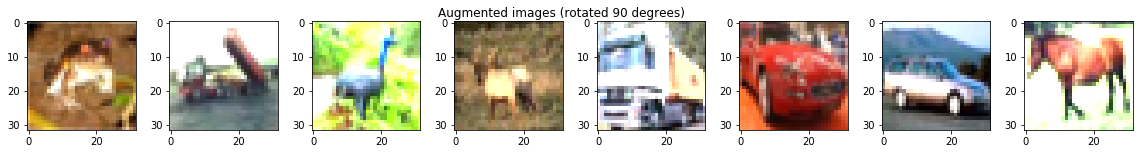

In [62]:

from keras.preprocessing.image import array_to_img

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(array_to_img(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;

## MODEL TRAINING USING AUGUMENTED DATASET

In [63]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [64]:
datagen.fit(X_train)

In [65]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)


Epoch 1/2


ValueError: Error when checking target: expected dense_3 to have shape (10,) but got array with shape (1,)

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)